In [1]:
import cv2 as cv,numpy as np,os,shutil,torch
from os.path import *
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
imgsDir = "/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/clipped_tifs"
annotDir = "/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/gt_2_classes_shrinkdBldngs"
imgs = glob(imgsDir+"/*tif")
annots = list(map(lambda x: x.replace(basename(imgsDir),basename(annotDir)),imgs))

In [ ]:
train,_ = train_test_split(imgs,test_size = 0.2,random_state=55)
val,test = train_test_split(_,test_size = 0.2,random_state=55)
len(train),len(val),len(test)

In [ ]:
with open("/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/trainImgs.txt",'w') as f:
    for img in train:
        f.write(f"{img},{img.replace(basename(imgsDir),basename(annotDir))}\n")

with open("/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/valImgs.txt",'w') as f:
    for img in val:
        f.write(f"{img},{img.replace(basename(imgsDir),basename(annotDir))}\n")

with open("/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/testImgs.txt",'w') as f:
    for img in test:
        f.write(f"{img},{img.replace(basename(imgsDir),basename(annotDir))}\n")

In [ ]:
trainList = "/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/trainImgs.txt"
valList = "/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/valImgs.txt"
testList = "/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/testImgs.txt"

In [ ]:
inLblPxl = 1
outLblPxl = 255
outBckgPxl = 0

In [ ]:
def writeImgsForRecMdl(imgLstPth,outDir,inLblPxl = 1,outLblPxl = 255,outBckgPxl=0):
    imgs = list(map(lambda x: x.replace('\n','').split(','),open(imgLstPth).readlines()))
    imgOutPth = join(outDir,'images')
    maskOutPth = join(outDir,'masks')
    os.makedirs(imgOutPth,exist_ok=True)
    os.makedirs(maskOutPth,exist_ok=True)
    for imgPth,maskPth in tqdm(imgs):
        shutil.copy(imgPth,imgOutPth)
        mask = cv.imread(maskPth)
        mask[mask==inLblPxl] = outLblPxl
        mask[mask!=outLblPxl] = outBckgPxl
        cv.imwrite(join(maskOutPth,basename(maskPth)),mask)


In [ ]:
writeImgsForRecMdl(trainList,outDir="/home/pictor/workspace/Akhil/Confidence/Data/RecData/shrnkdBldngs/Train")
writeImgsForRecMdl(valList,outDir="/home/pictor/workspace/Akhil/Confidence/Data/RecData/shrnkdBldngs/Val")
writeImgsForRecMdl(testList,outDir="/home/pictor/workspace/Akhil/Confidence/Data/RecData/shrnkdBldngs/Test")

In [2]:
import pickle
with open('/home/pictor/workspace/Akhil/Confidence/codes/Shift_Net_pytorch_New/shrinked_buildins.pkl','rb') as f:
    l = pickle.load(f)

In [3]:
import pandas as pd
lossDf = pd.DataFrame(l)
lossDf.head()

train  \
1  [{'G_GAN': 0.27672722935676575, 'G_L1': 20.309...   
2  [{'G_GAN': 0.4050072133541107, 'G_L1': 4.57216...   
3  [{'G_GAN': 0.199371337890625, 'G_L1': 4.856763...   
4  [{'G_GAN': 0.3488161265850067, 'G_L1': 4.22177...   
5  [{'G_GAN': 0.2619399130344391, 'G_L1': 3.18955...   

                                                 val  
1                                                 []  
2                                                 []  
3                                                 []  
4                                                 []  
5  [{'G_GAN': 0.13064931333065033, 'G_L1': 2.7373...

In [4]:
train_loss_per_epoch={}
for n,train_losss in enumerate(lossDf.train.values):
    train_loss_per_epoch[n] = train_losss[0]
    for lss in train_losss[1:]:
        for k,v in train_loss_per_epoch[n].items():
            train_loss_per_epoch[n][k] += lss[k]

trainLssDf = pd.DataFrame(train_loss_per_epoch)

In [5]:
val_loss_per_epoch={}
for n,val_losss in enumerate(lossDf.val.values):
    if val_losss:
        val_loss_per_epoch[n] = val_losss[0]
        for lss in val_losss[1:]:
            for k,v in val_loss_per_epoch[n].items():
                val_loss_per_epoch[n][k] += lss[k]

valLssDf = pd.DataFrame(val_loss_per_epoch)

In [64]:
valLssDf

4           9           14          19          24   \
G_GAN      49.254791   38.831405   20.170928  145.775734  150.038484   
G_L1     1031.964946  748.816940  776.319137  974.536475  685.291876   
D         213.197575  292.350175  224.109581   74.881422   61.206978   
style       0.025310    0.009358    0.005604    0.008160    0.008607   
content   494.680281  340.217974  332.863771  406.319648  317.816346   
tv          0.000000    0.000000    0.000000    0.000000    0.000000   

                29          34          39          44          49   ...  \
G_GAN    146.155998  150.954760  176.298094   10.353458  215.385819  ...   
G_L1     727.914282  606.762868  431.468462  510.794155  584.253267  ...   
D        120.956478  117.528209   74.577446  464.272725   23.861984  ...   
style      0.008538    0.002791    0.002180    0.002260    0.003449  ...   
content  369.150695  274.775015  216.743019  232.481516  275.191761  ...   
tv         0.000000    0.000000    0.000000    0.000000    0.000000  ...   

                239         244         249         254         259  \
G_GAN    344.840339  385.451504  423.153805  419.835161  404.521387   
G_L1     581.535136  590.903994  485.941148  478.215006  481.631624   
D          3.080429    2.655655    1.367024    1.652598  103.530334   
style      0.005081    0.004967    0.002526    0.006187    0.001807   
content  335.241557  379.856867  258.105681  304.106122  285.109135   
tv         0.000000    0.000000    0.000000    0.000000    0.000000   

                264         269         274         279         284  
G_GAN    257.120577  414.348249  378.400614  379.330642  400.143776  
G_L1     468.656268  409.963133  409.421268  532.674165  404.485793  
D         24.488949    1.658199    2.130451    2.069225  291.525738  
style      0.002480    0.001310    0.001341    0.007026    0.001702  
content  262.739685  237.284210  224.200589  280.369922  238.756934  
tv         0.000000    0.000000    0.000000    0.000000    0.000000  

[6 rows x 57 columns]

In [52]:
trainLssDf

0          1          2          3          4          5    \
G_GAN      4.903109   4.987278   3.575355   3.491938   2.864126   2.900267   
G_L1     127.575116  78.697526  67.536693  57.296997  51.503638  43.398210   
D          3.895835   4.855456   6.315024   7.460634   8.637290   8.795749   
style      0.005515   0.003152   0.002356   0.001591   0.000943   0.000753   
content   55.471360  35.212175  29.102404  25.080464  21.320018  18.475313   
tv         1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

               6          7          8          9    ...        277  \
G_GAN     3.898279   3.210231   3.720173   3.875354  ...  15.880649   
G_L1     41.338841  49.682052  39.252052  37.406964  ...  18.249538   
D         6.697822   8.201176   6.902840   7.657938  ...   0.244969   
style     0.000666   0.000787   0.000506   0.000410  ...   0.000102   
content  17.142842  19.755640  16.522908  15.324829  ...  10.170387   
tv        0.000000   0.000000   0.000000   0.000000  ...   0.000000   

               278        279        280        281        282        283  \
G_GAN    15.379482  15.709703  16.430062  14.353840  14.464162  15.148432   
G_L1     21.605586  19.915718  19.518405  18.897277  19.279072  17.471253   
D         0.225156   1.771208   1.901363   0.313972   1.489394   0.488735   
style     0.000137   0.000127   0.000167   0.000105   0.000104   0.000160   
content  12.219943  11.220891  11.232592  10.657674  10.755193  10.293479   
tv        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

               284        285        286  
G_GAN    16.395403  14.891244  15.569823  
G_L1     20.123023  20.209186  19.774419  
D         0.791241   1.562528   1.395018  
style     0.000100   0.000123   0.000106  
content  11.677349  11.925330  11.455732  
tv        0.000000   0.000000   0.000000  

[6 rows x 287 columns]

In [7]:
import matplotlib.pyplot as plt

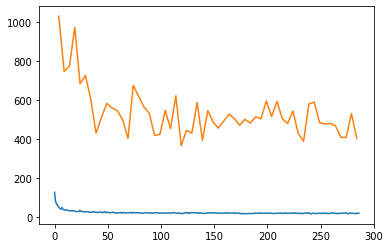

In [65]:
plt.plot(trainLssDf.loc['G_L1']);
plt.plot(valLssDf.loc['G_L1']);

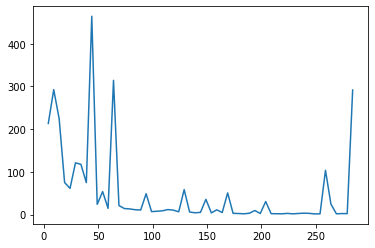

In [10]:
# plt.plot(trainLssDf.loc['D']);
plt.plot(valLssDf.loc['D']);

In [1]:
from glob import glob

In [5]:
baseDir = "/home/pictor/workspace/Akhil/Confidence/Data/RegData"
predShrnkMsks = glob(baseDir+"/*/AsegPreds/*/*_pred_shrink.png")
len(predShrnkMsks)

20376

In [6]:
predShrnkMsks[:3]

['/home/pictor/workspace/Akhil/Confidence/Data/RegData/Train/AsegPreds/epoch_126/2231_pred_shrink.png',
 '/home/pictor/workspace/Akhil/Confidence/Data/RegData/Train/AsegPreds/epoch_126/1678_pred_shrink.png',
 '/home/pictor/workspace/Akhil/Confidence/Data/RegData/Train/AsegPreds/epoch_126/616_pred_shrink.png']

In [16]:
from os.path import *
imNo = basename(predShrnkMsks[0]).split('_')[0]
imgPths = [f"/home/pictor/workspace/Akhil/Confidence/Data/ResTrueGreenV2/clipped_tifs/{basename(mskPth).split('_')[0]}.tif" for mskPth in predShrnkMsks]

In [17]:
len(imgPths),len(set(imgPths))

(20376, 3476)

In [8]:
from collections import Counter
c = Counter(l)

In [9]:
c

Counter({'Train': 13971, 'Test': 2835, 'Val': 3570})